In [2]:
import numpy as np
import scipy.constants as const
import uncertainties as unc
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import date
from scipy.ndimage import gaussian_filter1d
%matplotlib inline

In [3]:
def ad_adj(x):
    Datetimes =[]
    Values = []
    for i in x:
        Datetimes.append(i[0:11])
        Values.append(i[16:])
    return [Datetimes,Values]
        

In [4]:
dat = pd.read_csv('Decay.csv')
sensor_data = pd.DataFrame(np.array(ad_adj(dat.Time.values)).T, columns = ['TIME','Resistance'])
sensor_data.dtypes

TIME          object
Resistance    object
dtype: object

In [5]:
sensor_data['Resistance'] = sensor_data['Resistance'].astype(float)
sensor_data['Resistance'] = sensor_data['Resistance']
sensor_data['TIME'] = pd.to_datetime(sensor_data['TIME'])
sensor_data = sensor_data[(sensor_data[['TIME','Resistance']] != 0).all(axis=1)]


In [6]:
sensor_data = sensor_data.sort_values(by = 'TIME')
sensor_data['Resistance_Smooth'] = gaussian_filter1d(sensor_data['Resistance'], 30)

<ipython-input-37-82f2d0943259>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([0,10,20,30,40,50,60])


[Text(18767.472222222223, 0, '0'),
 Text(18767.479166666668, 0, '10'),
 Text(18767.48611111111, 0, '20'),
 Text(18767.493055555555, 0, '30'),
 Text(18767.5, 0, '40'),
 Text(18767.506944444445, 0, '50')]

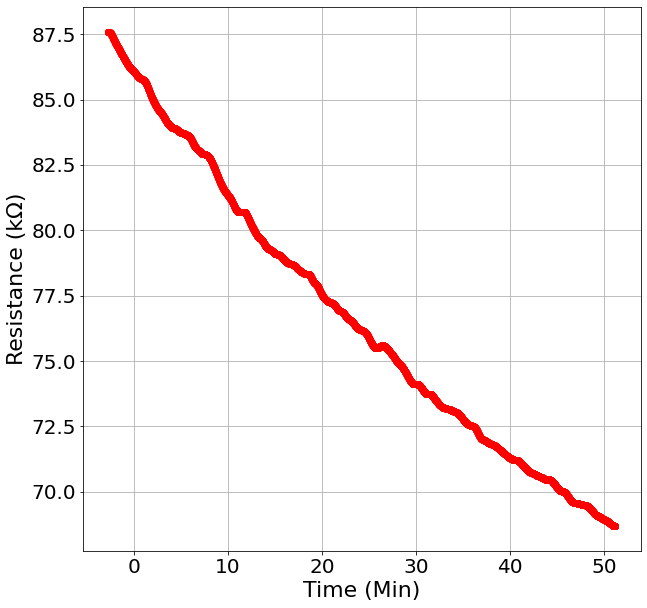

In [37]:
fig, ax1 = plt.subplots(figsize = (10,10))
ax1.grid()
ax1.plot(sensor_data['TIME'],sensor_data['Resistance_Smooth']/1000,'or')  
#ax1.set_title('Sensor Response', fontsize = 32, fontweight ='bold')
ax1.set_ylabel('Resistance (k\u03A9)',fontsize = 22)
ax1.tick_params( labelsize=20)
ax1.set_xlabel('Time (Min)',fontsize = 22)
ax1.set_xticklabels([0,10,20,30,40,50,60])

In [10]:
sensor_data['TIME'].iloc[-1] - sensor_data['TIME'].iloc[0]


Timedelta('0 days 00:53:55.810000')